1. 주어진 데이터는 각 소방서의 출동/도착 시간데이터이다.
출동시간과 도착시간 차이가 평균적으로 가장 오래 걸린 소방서의 시간을 분으로 변환해 출력하시오. (반올림 후 정수 출력)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/6_1/data6-1-1.csv")

In [ ]:
df.head()
df.info()
#날짜가 object 형식인걸 확인 했으니 이걸 바꿀 생각을 해야함
# pd.to_datetime 사용해서 datetime64[ns] 요 형식으로 바꿔줘야함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   소방서     100 non-null    object
 1   출동시간    100 non-null    object
 2   도착시간    100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [ ]:
#어떤 함수 써서 시간으로 바꾸는 datetime이었나 그게 있었는데 그게 몰라서 못품

#1. 형식변환 후 원래 df에 저장
df['출동시간'] = pd.to_datetime(df['출동시간'])
df['도착시간'] = pd.to_datetime(df['도착시간'])


#2. 도착 - 출동 (분)
df['diff'] = df['도착시간'] - df['출동시간']

#3.분 단위를 바로 구할 수없어서 초단위로 바꿔야함 그다음 60으로 나눠라
df['diff'] = df['diff'].dt.total_seconds() / 60

#4. 3번말고 다른 코드가 있음 -> but 위에 total_seconds로 써야함 day가 0이라 이문제에서는 상관없지만 , 배송기간의 경우 day 1 day2 이렇게 있고 그다음에 시간이 나오기 떄문에
    # 만약 그냥 dt.seconds만 쓰면 day를 무시해서 즉 적용이 안되어서 계산이 잘못 될 수 있음
# df['diff'].dt.seconds / 60


#5. 조회
df.head()
#6. 소방서별 차이 평균
result = df.groupby('소방서')['diff'].mean()

#7. 차이가 가장 큰 값( 소팅으로)
result.sort_values(ascending=False)[0]

#8.소팅대신 다른 풀이
print(round(result.max()))


# 시간 문제 풀때 주의점
# 72.35 이 뒤에 72분 35초로 계산하는 사람이 있는데 그러면 안됨 - >35초는 60초보다 커서 반올림해도된다 -> x 잘못된 생각임
# 0.35 * 60 =21이기 때문에 실제로 72.35 = 72분 21초임

81


<ipython-input-145-0457f6dd03c1>:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.sort_values(ascending=False)[0]


2. 학교에서 교사 한 명당 맡은 학생 수가 가장 많은 학교를 찾고, 그 학교의 전체 교사 수를 구하시오. (정수 출력)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/6_1/data6-1-2.csv")
df

,학교명,교사수,1학년,2학년,3학년,4학년,5학년,6학년
0,학교1,20,118,72,154,118,77,59
1,학교2,31,187,193,135,137,63,90
2,학교3,23,136,193,135,112,91,50
3,학교4,32,72,146,67,51,130,164
4,학교5,22,61,73,86,82,55,124
...,...,...,...,...,...,...,...,...
95,학교96,38,75,166,113,191,172,57
96,학교97,30,125,169,145,122,187,194
97,학교98,37,136,100,93,60,145,63
98,학교99,37,74,175,145,157,95,76


In [ ]:
#1. 전체학생수 구하기 iloc[행:열]
#2. 그냥 sum 해버리면 열방향으로 더하기 때문에 , axis=1로 해서 행방향으로 더하기 해줘야함 -> 학교 별로 더해야하기 때문에
#3. 전체라는 새로운 컬럼을 df로 만들어 버려서 하기
df.head()
df['전체'] = df.iloc[:,2:].sum(axis=1)
df.head()

#4.교사 한명당 맡은 학생수 (전체/교사)
df['전체/교사'] = df['전체'] / df['교사수']
df.head()

#5.전체/ 교사가 가장 큰 값을 가진 학교의 교사수
# idxmax -> 전체/교사 값중에서 가장 큰 값의 인덱스를 반환해줌
df['전체/교사'].idxmax()

#6. 7번이라고 나온 값을 출력
print(int(df.loc[7,'교사수']))

19


In [ ]:
# 내가 푼 틀린 방법 -> 틀린방법아님
df['전체학생수'] = df['1학년'] + df['2학년'] +df['3학년'] + df['4학년'] + df['5학년'] + df['6학년']

df['교사1명당학생수'] = (df['전체학생수'] / df['교사수'])


df = df.sort_values('교사1명당학생수',ascending=False)

df.iloc[0,1]


19

In [ ]:
# 데이터 읽기
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/6_1/data6-1-3.csv")
df

df['총범죄건수'] = df.iloc[:,1:-1].sum(axis=1)

# 2. 연도와 월 컬럼 생성 (pd.to_datetime 활용)
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y년 %m월')
df['년도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df

,날짜,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄,교통범죄,경찰서명,총범죄건수,년도,월
0,2020-04-01,26,142,83,71,33,182,B경찰서,537,2020,4
1,2021-06-01,12,131,78,65,30,201,E경찰서,517,2021,6
2,2020-06-01,22,104,84,72,34,201,A경찰서,517,2020,6
3,2024-02-01,16,137,72,80,30,180,C경찰서,515,2024,2
4,2022-03-01,17,125,87,76,25,220,C경찰서,550,2022,3
5,2024-11-01,25,148,90,67,33,210,B경찰서,573,2024,11
6,2020-07-01,14,134,84,72,32,182,A경찰서,518,2020,7
7,2020-03-01,14,129,76,60,29,202,C경찰서,510,2020,3
8,2022-01-01,23,140,83,60,26,219,A경찰서,551,2022,1
9,2022-11-01,26,122,72,62,31,180,E경찰서,493,2022,11


3. 연도별로 총 범죄 건수(범죄유형의 총합)의 월평균 값을 구한 후 그 값이 가장 큰 연도를 찾아, 해당 연도의 총 범죄 건수의 월평균 값을 출력하시오. (반올림하여 정수로 출력)

In [ ]:
import pandas as pd

# 데이터 읽기
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/6_1/data6-1-3.csv")

# 1. '총범죄건수' 생성

df['총범죄건수'] = df.iloc[:,1:-1].sum(axis=1)

# 2. 연도와 월 컬럼 생성 (pd.to_datetime 활용)
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y년 %m월')
df['년도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month

# # 3. 연도-월별로 총범죄건수 합계 구하기
월별총범죄건수 = df.groupby(['년도', '월'])['총범죄건수'].sum().reset_index()
print(월별총범죄건수)

# # 4. 연도별 월평균 구하기
연도별월평균 = 월별총범죄건수.groupby('년도')['총범죄건수'].mean()
print(연도별월평균)

# # # 5. 월평균이 가장 큰 연도, 그 값을 구하기
max_year = 연도별월평균.idxmax()
max_mean = round(연도별월평균[max_year])

print(max_year)

print(f"{max_year}년의 월평균 총범죄건수: {max_mean}")


      년도   월  총범죄건수
0   2020   1    512
1   2020   2    519
2   2020   3    510
3   2020   4    537
4   2020   5    551
5   2020   6    517
6   2020   7    518
7   2020   8    495
8   2020   9    506
9   2020  10    529
10  2020  11    532
11  2021   1    493
12  2021   2    546
13  2021   4    534
14  2021   6    517
15  2021   7    505
16  2021   8    518
17  2021   9    512
18  2021  10    532
19  2021  11    526
20  2022   1    551
21  2022   2    497
22  2022   3    550
23  2022   4    491
24  2022   5    514
25  2022   6    548
26  2022   7    508
27  2022   8    510
28  2022   9    485
29  2022  10    527
30  2022  11    493
31  2022  12    505
32  2023   1    553
33  2023   3    563
34  2023   5    519
35  2023   6    560
36  2023   8    529
37  2023   9    504
38  2023  10    510
39  2023  11    509
40  2023  12    532
41  2024   1    520
42  2024   2    515
43  2024   3    552
44  2024   4    536
45  2024   5    522
46  2024   9    514
47  2024  10    503
48  2024  11    573


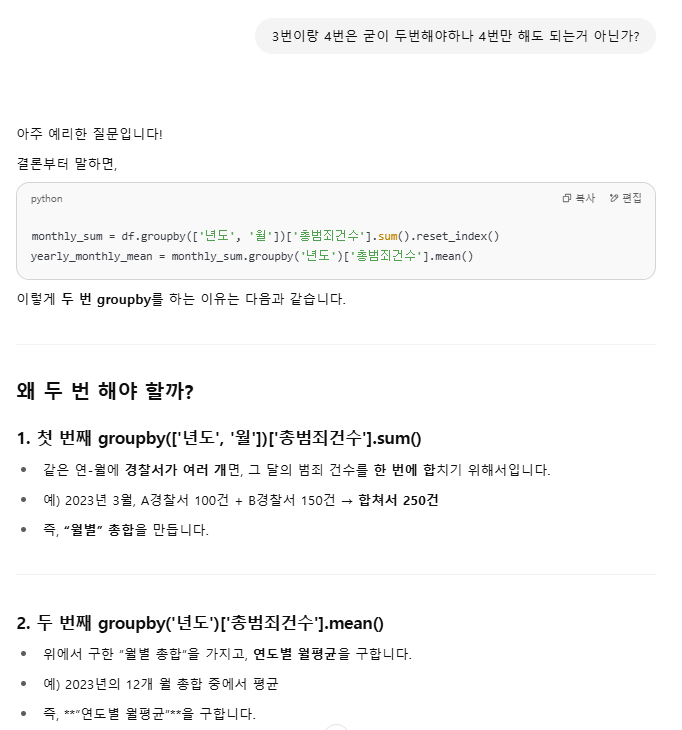

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/6_1/data6-1-3.csv")
df

,날짜,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄,교통범죄,경찰서명
0,2020년 04월,26,142,83,71,33,182,B경찰서
1,2021년 06월,12,131,78,65,30,201,E경찰서
2,2020년 06월,22,104,84,72,34,201,A경찰서
3,2024년 02월,16,137,72,80,30,180,C경찰서
4,2022년 03월,17,125,87,76,25,220,C경찰서
5,2024년 11월,25,148,90,67,33,210,B경찰서
6,2020년 07월,14,134,84,72,32,182,A경찰서
7,2020년 03월,14,129,76,60,29,202,C경찰서
8,2022년 01월,23,140,83,60,26,219,A경찰서
9,2022년 11월,26,122,72,62,31,180,E경찰서


In [ ]:
#풀이 방법 2가지
#1번은 object형식을 문자 슬라이싱을 해서 그냥 푸는것
# 저 밑에 퇴근후 딴짓 풀이 보면 됨

#2번은 pd.to_datetime을 쓰는법
df['총범죄건수'] = df.iloc[:,1:-1].sum(axis=1)
# print(df['총범죄건수'])

df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y년 %m월')
df['년도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month

#년도별로 총 범죄 건수의 월평균
result = (df.groupby('년도')['총범죄건수'].sum() /12)
result2 = df.groupby(['년도','월'])['총범죄건수'].mean()
print(result)
print(result2)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:

df['날짜'] = pd.to_datetime(df['날짜'], format = '%Y년 %m월')
df['년도'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
print(df)

           날짜  강력범죄  절도범죄  폭력범죄  지능범죄  풍속범죄  교통범죄  경찰서명    년도   월
0  2020-04-01    26   142    83    71    33   182  B경찰서  2020   4
1  2021-06-01    12   131    78    65    30   201  E경찰서  2021   6
2  2020-06-01    22   104    84    72    34   201  A경찰서  2020   6
3  2024-02-01    16   137    72    80    30   180  C경찰서  2024   2
4  2022-03-01    17   125    87    76    25   220  C경찰서  2022   3
5  2024-11-01    25   148    90    67    33   210  B경찰서  2024  11
6  2020-07-01    14   134    84    72    32   182  A경찰서  2020   7
7  2020-03-01    14   129    76    60    29   202  C경찰서  2020   3
8  2022-01-01    23   140    83    60    26   219  A경찰서  2022   1
9  2022-11-01    26   122    72    62    31   180  E경찰서  2022  11
10 2022-12-01    22   104    87    80    31   181  C경찰서  2022  12
11 2021-10-01    18   130    71    77    30   206  C경찰서  2021  10
12 2024-01-01    10   140    90    65    31   184  B경찰서  2024   1
13 2024-12-01    21   142    77    62    35   183  E경찰서  2024  12
14 2020-11

In [ ]:
df.head()

,날짜,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄,교통범죄,경찰서명
0,2020년 04월,26,142,83,71,33,182,B경찰서
1,2021년 06월,12,131,78,65,30,201,E경찰서
2,2020년 06월,22,104,84,72,34,201,A경찰서
3,2024년 02월,16,137,72,80,30,180,C경찰서
4,2022년 03월,17,125,87,76,25,220,C경찰서


In [ ]:
#1. 총범죄 건수 (이거 구하고 밑에거 같은 칸에 하면 자꾸 오류떠서 밑에 코딩 창으로 가서 실행)
df['총범죄'] = df.iloc[:,1:-1].sum(axis=1)
df.head()



,날짜,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄,교통범죄,경찰서명,총범죄
0,2020년 04월,26,142,83,71,33,182,B경찰서,537
1,2021년 06월,12,131,78,65,30,201,E경찰서,517
2,2020년 06월,22,104,84,72,34,201,A경찰서,517
3,2024년 02월,16,137,72,80,30,180,C경찰서,515
4,2022년 03월,17,125,87,76,25,220,C경찰서,550


In [ ]:
#2.연도 구분 - >string을 슬라이싱 해서
# str[:4]의 뜻은 df날짜에 있는 값들 처음부터 2020년에서 0123 순서까지 출력하라는것
df['년도'] = df['날짜'].str[:4]
df.head()

,날짜,강력범죄,절도범죄,폭력범죄,지능범죄,풍속범죄,교통범죄,경찰서명,총범죄,년도
0,2020년 04월,26,142,83,71,33,182,B경찰서,537,2020
1,2021년 06월,12,131,78,65,30,201,E경찰서,517,2021
2,2020년 06월,22,104,84,72,34,201,A경찰서,517,2020
3,2024년 02월,16,137,72,80,30,180,C경찰서,515,2024
4,2022년 03월,17,125,87,76,25,220,C경찰서,550,2022


In [ ]:
#3.연도별 그룹핑(총범죄).sum()   /12값은 12개월이라 나눠주면 평균이 나옴

result = df.groupby('년도')['총범죄'].sum() / 12

In [ ]:
#4. 가장 큰 값

print(round(result.max()))

515
